In [29]:
from sqlalchemy import create_engine
import pymysql
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import pylab
sns.set()
%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0,8.0)
#SKLearnStuff for ML
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn import preprocessing
le=preprocessing.LabelEncoder()
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
df= pd.read_csv("D:/Data_Analytics/UT_DataAnalytics/Course 2_ Data Science With Python/Cleanup1.csv")
df

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default_next_month
0,1,20000,female,university,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,default
1,2,120000,female,university,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,default
2,3,90000,female,university,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,not default
3,4,50000,female,university,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,not default
4,5,50000,male,university,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,not default
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,29996,220000,male,high school,1,39,0,0,0,0,...,88004,31237,15980,8500,20000,5003,3047,5000,1000,not default
29996,29997,150000,male,high school,2,43,-1,-1,-1,-1,...,8979,5190,0,1837,3526,8998,129,0,0,not default
29997,29998,30000,male,university,2,37,4,3,2,-1,...,20878,20582,19357,0,0,22000,4200,2000,3100,default
29998,29999,80000,male,high school,1,41,1,-1,0,0,...,52774,11855,48944,85900,3409,1178,1926,52964,1804,default


In [30]:
df['SEX']= le.fit_transform(df['SEX'])
df['EDUCATION']= le.fit_transform(df['EDUCATION'])   
df['default_next_month']= le.fit_transform(df['default_next_month'])
df

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default_next_month
0,1,20000,0,3,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,0
1,2,120000,0,3,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,0
2,3,90000,0,3,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,1
3,4,50000,0,3,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,1
4,5,50000,1,3,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,29996,220000,1,1,1,39,0,0,0,0,...,88004,31237,15980,8500,20000,5003,3047,5000,1000,1
29996,29997,150000,1,1,2,43,-1,-1,-1,-1,...,8979,5190,0,1837,3526,8998,129,0,0,1
29997,29998,30000,1,3,2,37,4,3,2,-1,...,20878,20582,19357,0,0,22000,4200,2000,3100,0
29998,29999,80000,1,1,1,41,1,-1,0,0,...,52774,11855,48944,85900,3409,1178,1926,52964,1804,0


In [31]:
pay_features = ['PAY_0','PAY_2','PAY_3','PAY_4','PAY_5','PAY_6']
for p in pay_features:
    df.loc[df[p]<=0, p] = 0


In [32]:
X=df.iloc[:,1:24]
y=df.iloc[:,24:25]
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, precision_recall_curve
from sklearn.preprocessing import RobustScaler

from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [1,2])], remainder='passthrough')
X = np.array(ct.fit_transform(X))

In [33]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size=0.2, random_state=1, stratify=y)

In [34]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)


### Confusion Matrix

In [35]:


def CMatrix(CM, labels=['pay','default']):
    df = pd.DataFrame(data=CM, index=labels, columns=labels)
    df.index.name='TRUE'
    df.columns.name='PREDICTION'
    df.loc['TOTAL'] = df.sum()
    df['Total'] = df.sum(axis=1)
    return df

In [36]:
### model metrics

metrics=pd.DataFrame(index=['accuracy', 'precision', 'recall', "F1"],
                    columns = ["LinearReg" ,'LogisticReg','RForest', 'NaiveBayes', "SVM", "KNN"])
metrics



,LinearReg,LogisticReg,RForest,NaiveBayes,SVM,KNN
accuracy,NaN,NaN,NaN,NaN,NaN,NaN
precision,NaN,NaN,NaN,NaN,NaN,NaN
recall,NaN,NaN,NaN,NaN,NaN,NaN
F1,NaN,NaN,NaN,NaN,NaN,NaN


### Linear Regression

In [37]:
from sklearn.linear_model import LinearRegression

linear_regression = LinearRegression(n_jobs=10)

linear_regression.fit(X_train,  y_train.values.ravel())
y_pred=linear_regression.predict(X_test)


from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from math import sqrt

In [38]:
y_pred_test = linear_regression.predict(X_test)
rmse = sqrt(mean_squared_error(y_test, y_pred_test))
print(rmse)

0.3762240766308978


In [39]:
predRsquared = r2_score(y_test, y_pred_test)
predRsquared

0.17827033263709147

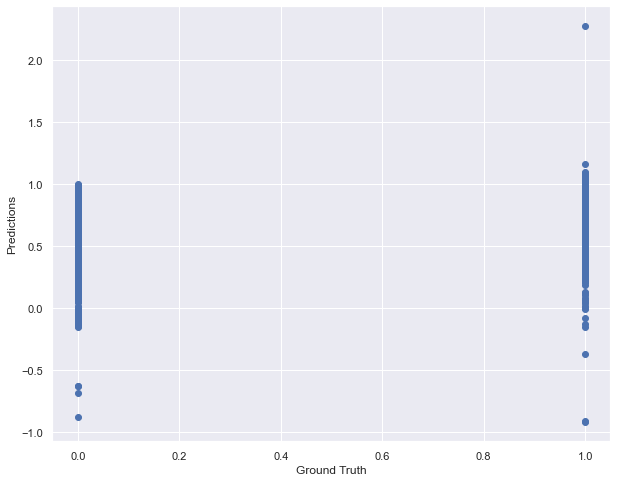

In [40]:
plt.scatter(y_test, y_pred_test)
plt.xlabel('Ground Truth')
plt.ylabel('Predictions')
plt.show()

## Logistic Regression 


In [41]:
from sklearn.linear_model import LogisticRegression

logistic_regression = LogisticRegression(n_jobs=-1, random_state=0)

logistic_regression.fit(X_train,  y_train.values.ravel())

y_pred=logistic_regression.predict(X_test)

from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[ 464  863]
 [ 212 4461]]


In [42]:
y_pred_test = logistic_regression.predict(X_test)
metrics.loc['accuracy','LogisticReg'] = accuracy_score(y_pred=y_pred_test, y_true=y_test)
metrics.loc['precision','LogisticReg'] = precision_score(y_pred=y_pred_test, y_true=y_test)
metrics.loc['recall','LogisticReg'] = recall_score(y_pred=y_pred_test, y_true=y_test)

precision=precision_score(y_pred=y_pred_test, y_true=y_test)
recall=recall_score(y_pred=y_pred_test, y_true=y_test)

metrics.loc['F1','LogisticReg'] = 2 * (precision * recall) / (precision + recall)
metrics


,LinearReg,LogisticReg,RForest,NaiveBayes,SVM,KNN
accuracy,NaN,0.820833,NaN,NaN,NaN,NaN
precision,NaN,0.837904,NaN,NaN,NaN,NaN
recall,NaN,0.954633,NaN,NaN,NaN,NaN
F1,NaN,0.892468,NaN,NaN,NaN,NaN


In [43]:
precision_recall_curve(y_test, y_pred)

(array([0.77883333, 0.83790383, 1.        ]),
 array([1.      , 0.954633, 0.      ]),
 array([0, 1]))

In [12]:
recall_score(y_test, y_pred)

0.9546329980740423

## Classificaton Trees

In [14]:
from sklearn.ensemble import RandomForestClassifier

RForest = RandomForestClassifier(random_state=0)

RForest.fit(X_train,  y_train.values.ravel())

y_pred=RForest.predict(X_test)

from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[ 496  831]
 [ 290 4383]]


0.8131666666666667

In [15]:
y_pred_test = RForest.predict(X_test)
metrics.loc['accuracy','RForest'] = accuracy_score(y_pred=y_pred_test, y_true=y_test)
metrics.loc['precision','RForest'] = precision_score(y_pred=y_pred_test, y_true=y_test)
metrics.loc['recall','RForest'] = recall_score(y_pred=y_pred_test, y_true=y_test)

precision=precision_score(y_pred=y_pred_test, y_true=y_test)
recall=recall_score(y_pred=y_pred_test, y_true=y_test)

metrics.loc['F1','RForest'] = 2 * (precision * recall) / (precision + recall)
metrics


,LogisticReg,RForest,NaiveBayes,SVM,KNN
accuracy,0.820833,0.813167,NaN,NaN,NaN
precision,0.837904,0.840621,NaN,NaN,NaN
recall,0.954633,0.937941,NaN,NaN,NaN
F1,0.892468,0.886619,NaN,NaN,NaN


## Naive Bayes

In [16]:
from sklearn.naive_bayes import GaussianNB

GNB = GaussianNB()

GNB.fit(X_train,  y_train.values.ravel())

y_pred=GNB.predict(X_test)

from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[ 750  577]
 [ 865 3808]]


0.7596666666666667

In [17]:
y_pred_test = GNB.predict(X_test)
metrics.loc['accuracy','NaiveBayes'] = accuracy_score(y_pred=y_pred_test, y_true=y_test)
metrics.loc['precision','NaiveBayes'] = precision_score(y_pred=y_pred_test, y_true=y_test)
metrics.loc['recall','NaiveBayes'] = recall_score(y_pred=y_pred_test, y_true=y_test)
precision=precision_score(y_pred=y_pred_test, y_true=y_test)
recall=recall_score(y_pred=y_pred_test, y_true=y_test)

metrics.loc['F1','NaiveBayes'] = 2 * (precision * recall) / (precision + recall)
metrics

,LogisticReg,RForest,NaiveBayes,SVM,KNN
accuracy,0.820833,0.813167,0.759667,NaN,NaN
precision,0.837904,0.840621,0.868415,NaN,NaN
recall,0.954633,0.937941,0.814894,NaN,NaN
F1,0.892468,0.886619,0.840804,NaN,NaN


## SVM Model

In [18]:
from sklearn.svm import SVC
SVC = SVC(kernel = 'rbf', random_state = 0)
SVC.fit(X_train, y_train.values.ravel())

y_pred=SVC.predict(X_test)

from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[ 482  845]
 [ 237 4436]]


0.8196666666666667

In [19]:
y_pred_test = SVC.predict(X_test)
metrics.loc['accuracy','SVM'] = accuracy_score(y_pred=y_pred_test, y_true=y_test)
metrics.loc['precision','SVM'] = precision_score(y_pred=y_pred_test, y_true=y_test)
metrics.loc['recall','SVM'] = recall_score(y_pred=y_pred_test, y_true=y_test)
precision=precision_score(y_pred=y_pred_test, y_true=y_test)
recall=recall_score(y_pred=y_pred_test, y_true=y_test)

metrics.loc['F1','SVM'] = 2 * (precision * recall) / (precision + recall)
metrics

,LogisticReg,RForest,NaiveBayes,SVM,KNN
accuracy,0.820833,0.813167,0.759667,0.819667,NaN
precision,0.837904,0.840621,0.868415,0.839992,NaN
recall,0.954633,0.937941,0.814894,0.949283,NaN
F1,0.892468,0.886619,0.840804,0.8913,NaN


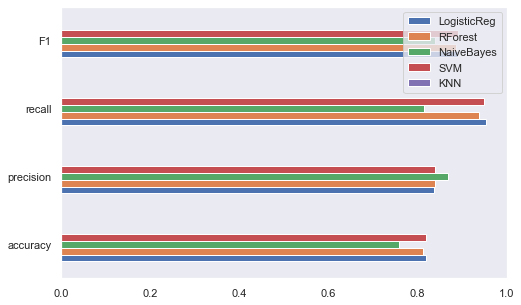

In [20]:
fig, ax = plt.subplots(figsize=(8,5))
metrics.plot(kind='barh', ax=ax)
ax.grid();


## K-NN

In [21]:
from sklearn.neighbors import KNeighborsClassifier
KNN = KNeighborsClassifier(n_neighbors = 8, metric = 'minkowski', p = 2)
KNN.fit(X_train, y_train.values.ravel())

y_pred=KNN.predict(X_test)

from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)


[[ 529  798]
 [ 429 4244]]


0.7955

In [22]:
y_pred_test = SVC.predict(X_test)
metrics.loc['accuracy','KNN'] = accuracy_score(y_pred=y_pred_test, y_true=y_test)
metrics.loc['precision','KNN'] = precision_score(y_pred=y_pred_test, y_true=y_test)
metrics.loc['recall','KNN'] = recall_score(y_pred=y_pred_test, y_true=y_test)
precision=precision_score(y_pred=y_pred_test, y_true=y_test)
recall=recall_score(y_pred=y_pred_test, y_true=y_test)

metrics.loc['F1','KNN'] = 2 * (precision * recall) / (precision + recall)
metrics

,LogisticReg,RForest,NaiveBayes,SVM,KNN
accuracy,0.820833,0.813167,0.759667,0.819667,0.819667
precision,0.837904,0.840621,0.868415,0.839992,0.839992
recall,0.954633,0.937941,0.814894,0.949283,0.949283
F1,0.892468,0.886619,0.840804,0.8913,0.8913


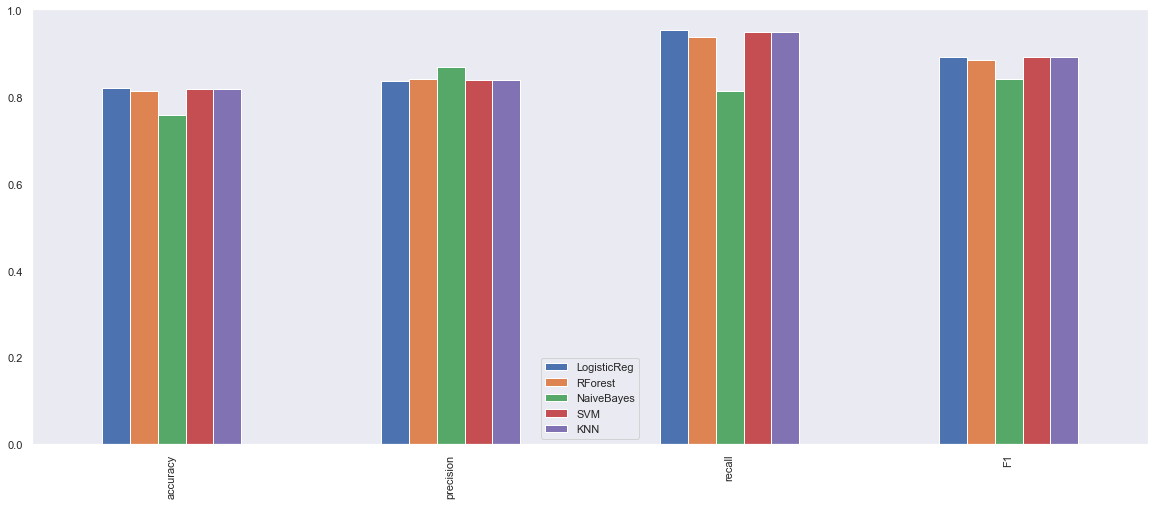

In [33]:
fig, ax = plt.subplots(figsize=(20,8) )
metrics.plot(kind='bar', ax=ax)
ax.grid();

In [24]:
precision_nb, recall_nb, thresholds_nb = precision_recall_curve(y_true=y_test, probas_pred=GNB.predict_proba(X_test)[:,1])
precision_lr, recall_lr, thresholds_lr = precision_recall_curve(y_true=y_test, probas_pred=logistic_regression.predict_proba(X_test)[:,1])

In [25]:
ax.plot(precision_nb, recall_nb, label='NaiveBayes')
ax.plot(precision_lr, recall_lr, label='LogisticReg')
ax.set_xlabel('Precision')
ax.set_ylabel('Recall')
ax.set_title('Precision-Recall Curve')
ax.hlines(y=0.5, xmin=0, xmax=1, color='r')
ax.legend()
ax.grid();

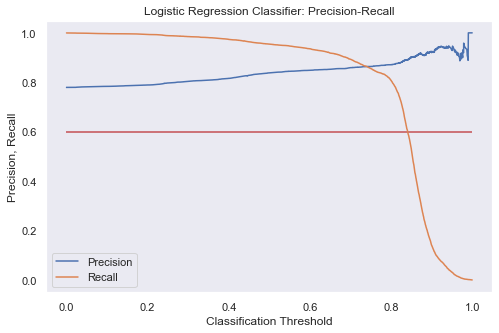

In [26]:
fig, ax = plt.subplots(figsize=(8,5))
ax.plot(thresholds_lr, precision_lr[1:], label='Precision')
ax.plot(thresholds_lr, recall_lr[1:], label='Recall')
ax.set_xlabel('Classification Threshold')
ax.set_ylabel('Precision, Recall')
ax.set_title('Logistic Regression Classifier: Precision-Recall')
ax.hlines(y=0.6, xmin=0, xmax=1, color='r')
ax.legend()
ax.grid();